In [3]:
import sklearn
print(sklearn.__version__)

0.23.1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# 1. 실습: iris 2가지 특징

In [5]:
iris = load_iris()

In [6]:
x = iris.data[:, 2:]
y = iris.target

In [9]:
print(iris.feature_names[2:])
print(x[:5])

['petal length (cm)', 'petal width (cm)']
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [10]:
print(iris.target_names)
print(y[:5])

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0]


In [11]:
tree_clf = DecisionTreeClassifier(max_depth = 2) #최대깊이 2로 설정

In [12]:
tree_clf.fit(x,y) #데이터 훈련

DecisionTreeClassifier(max_depth=2)

<ipython-input-23-aa713985556e>:17: UserWarning: The following kwargs were not used by contour: 'alpah'
  plt.contourf(x1, x2, y_pred, alpah=0.3)


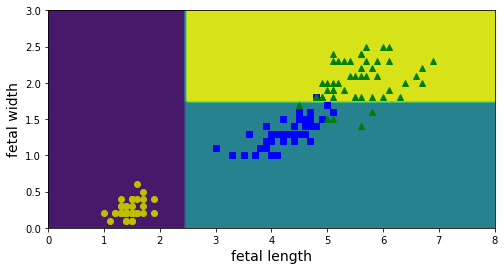

In [23]:
#데이터 시각화
plt.figure(figsize = (8,4))
plt.plot(x[:,0][y==0], x[:,1][y==0], "yo")
plt.plot(x[:,0][y==1], x[:,1][y==1], "bs")
plt.plot(x[:,0][y==2], x[:,1][y==2], "g^")

plt.xlabel("fetal length", fontsize=14)
plt.ylabel("fetal width", fontsize=14)

x1s = np.linspace(0,8,100) #0부터 8사이의 숫자를 100개로 나타내라.
x2s = np.linspace(0,3,100)

x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_new).reshape(x1.shape)

plt.contourf(x1, x2, y_pred, alpah=0.3)

plt.show()

In [26]:
import os

path = "images"
if not os.path.isdir(path):
    os.mkdir(path)
if not os.path.isdir("images/decision_tree"):
    os.mkdir("images/decision_tree")

In [27]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file="images/decision_tree/classification_tree.dot",
               feature_names = ["petal length","petal width"],
               class_names = iris.target_names,
               rounded = True,
               filled = True)

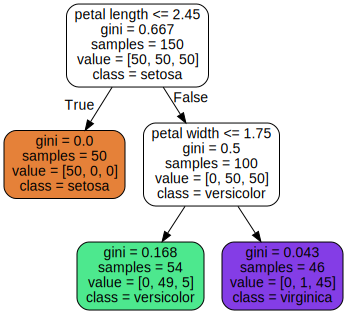

In [29]:
with open("images/decision_tree/classification_tree.dot") as f:
    dot_graph = f.read()
    
dot = graphviz.Source(dot_graph)
dot.format = "png"
dot.render(filename='classifiaction_tree', directory = "images/decision_tree",cleanup=True)
dot

In [31]:
#training set과 test set으로 나누는 것
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

In [33]:
print(X_train.shape)
print(X_test.shape)

(120, 2)
(30, 2)


In [34]:
clf = DecisionTreeClassifier(max_depth = 2)

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [36]:
pred = clf.predict(X_test)
pred

array([2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 2])

In [37]:
y_test

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [39]:
print(format(accuracy_score(pred, y_test)*100,".2f"))

86.67


# 2. 과제: iris 4가지 특징

In [80]:
X2 = iris.data
Y = iris.target

In [81]:
print(iris.feature_names)
print(X2[:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [82]:
print(iris.target_names)
print(Y[:5])

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0]


In [83]:
tree_clf = DecisionTreeClassifier(max_depth = 2)

In [84]:
tree_clf.fit(X2,Y)

DecisionTreeClassifier(max_depth=2)

In [85]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file="images/decision_tree/classification_tree1.dot",
               feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
               class_names = iris.target_names,
               rounded = True,
               filled = True)

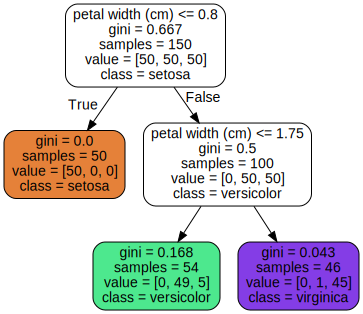

In [86]:
with open("images/decision_tree/classification_tree1.dot") as f:
    dot_graph = f.read()
    
dot = graphviz.Source(dot_graph)
dot.format = "png"
dot.render(filename='classifiaction_tree1', directory = "images/decision_tree",cleanup=True)
dot

In [87]:
X2_train, X2_test, y_train, y_test = train_test_split(X2,Y, test_size=0.2, random_state=11)

In [88]:
print(X2_train.shape)
print(X2_test.shape)

(120, 4)
(30, 4)


In [89]:
clf = DecisionTreeClassifier(max_depth = 2)

In [90]:
clf.fit(X2_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [91]:
pred = clf.predict(X2_test)
pred

array([2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 2])

In [92]:
y_test

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [93]:
print(format(accuracy_score(pred, y_test)*100,".2f"))

86.67
